# Student's JSON Data

* Libraries

In [339]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

# Regex
import regex as re

# Matplotlib
import matplotlib.pyplot as plt


In [347]:
df=pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json", lines=True)
df.head()

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."


In [327]:
df['_id'][0]

{'$oid': '50b59cd75bed76f46522c34e'}

* Cleaning _id

In [328]:
def clean_id_func(da):
    clean_id=re.sub('^{.*:..|\'.*',"",str(da))
    return( clean_id)
df['_id']=df['_id'].apply(clean_id_func).astype(str)

* Information about DataFrame

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


* Cleaning Scores

In [330]:
df['scores'][0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [331]:
clean_scores_exam=re.sub("^{.*re':.|}","",str(df['scores'][0][0]))
clean_scores_exam

'57.92947112575566'

In [332]:
home=re.sub("^{.*re':.|}","",str(df['scores'][279][3]))
home

'37.78991935258481'

* Adding the cleaned scores to the new columns

In [333]:
exam_score=[]
quiz_score=[]
homework_score=[]
for i in range(280):
    exam_score.append(round(float(re.sub("^{.*re':.|}","",str(df['scores'][i][0]))),2))
    quiz_score.append(round(float(re.sub("^{.*re':.|}","",str(df['scores'][i][1]))),2))
    home_one=re.sub("^{.*re':.|}","",str(df['scores'][i][2]))
    home2=1
    home3=1
    try:
        home_two=re.sub("^{.*re':.|}","",str(df['scores'][i][3]))
    except:
        home_two=home_one
        home2=0
        
    try:
        home_three=re.sub("^{.*re':.|}","",str(df['scores'][i][4]))
    except:
        home_three=home_one
        home3=0
    if(home2==0):
        homework_score.append(round((float(home_one)+float(home_two)+float(home_three))/3,2))
    elif(home3==0):
        homework_score.append(round((float(home_one)+float(home_two))/2,2))
    else:
        homework_score.append(round((float(home_one)+float(home_two)+float(home_three))/3,2))
    

*Drop the score column

In [334]:
df=df.drop('scores',axis=1)

* Adding new columns to the df

In [335]:
df["exam_score"]=exam_score
df['quiz_score']=quiz_score
df['homework_score']=homework_score

In [346]:
df.head()

,_id,student_id,class_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,2,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,28,39.18,78.44,47.31
2,50b59cd75bed76f46522c350,0,5,88.23,79.29,20.06
3,50b59cd75bed76f46522c351,0,16,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,24,4.44,28.63,85.35


* New informaiton about the df

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             280 non-null    object 
 1   student_id      280 non-null    int64  
 2   class_id        280 non-null    int64  
 3   exam_score      280 non-null    float64
 4   quiz_score      280 non-null    float64
 5   homework_score  280 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 13.2+ KB


* Description of the df

In [338]:
df.describe()

,student_id,class_id,exam_score,quiz_score,homework_score
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,23.717857,15.096429,50.831143,48.960893,48.712786
std,14.314029,8.958766,28.709625,29.398710,20.676447
min,0.000000,0.000000,0.500000,0.720000,4.790000
25%,11.000000,7.000000,24.117500,23.837500,34.062500
50%,24.000000,15.500000,49.685000,49.850000,48.490000
75%,37.000000,23.000000,75.517500,72.822500,62.710000
max,49.000000,30.000000,99.980000,99.910000,98.920000


* Exam score Vs Homework score Graph (Scattere)



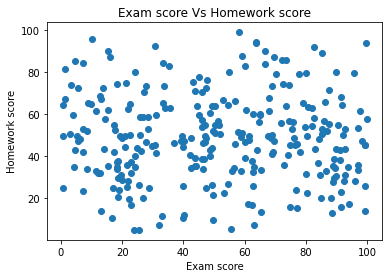

In [345]:
x=df.exam_score[20:30]
y=df.homework_score[20:30]
plt.title("Exam score Vs Homework score")
plt.xlabel("Exam score")
plt.ylabel("Homework score")
plot=plt.scatter(x,y)

* Conclusion: All the students who does the homeworks well doesn't necessesarly do well in exams